In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [2]:
#Loading the Dataset
hrt_d = pd.read_excel("C:\\Users\\bhimr\\OneDrive\\Documents\\Book12345.xlsx")

In [3]:
hrt_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
#Performing One hot coding for categorical features in dataset
hrt_d = pd.get_dummies(hrt_d)
hrt_d.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,False,True,False,...,True,False,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.0,0,False,True,False,...,True,False,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.4,0,False,True,True,...,True,False,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.0,0,False,True,False,...,True,False,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.5,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False


In [5]:
#fbs True false values to numeric 1 and 0
hrt_d['fbs'] = hrt_d['fbs'].map({True:1,False:0})

In [6]:
#Checking for null values
hrt_d.isnull().sum()

age                          0
trestbps                     0
chol                         0
fbs                          0
thalch                       0
oldpeak                     62
num                          0
sex_Female                   0
sex_Male                     0
cp_asymptomatic              0
cp_atypical angina           0
cp_non-anginal               0
cp_typical angina            0
restecg_lv hypertrophy       0
restecg_normal               0
restecg_st-t abnormality     0
exang_False                  0
exang_True                   0
exang_FALSE                  0
exang_TURE                   0
slope_downsloping            0
slope_flat                   0
slope_upsloping              0
thal_fixed defect            0
thal_normal                  0
thal_reversable defect       0
dtype: int64

In [7]:
#Replacing the  null values with median value of the column
hrt_d['oldpeak'] = hrt_d['oldpeak'].fillna(hrt_d['oldpeak'].median())

<Figure size 1500x1000 with 0 Axes>

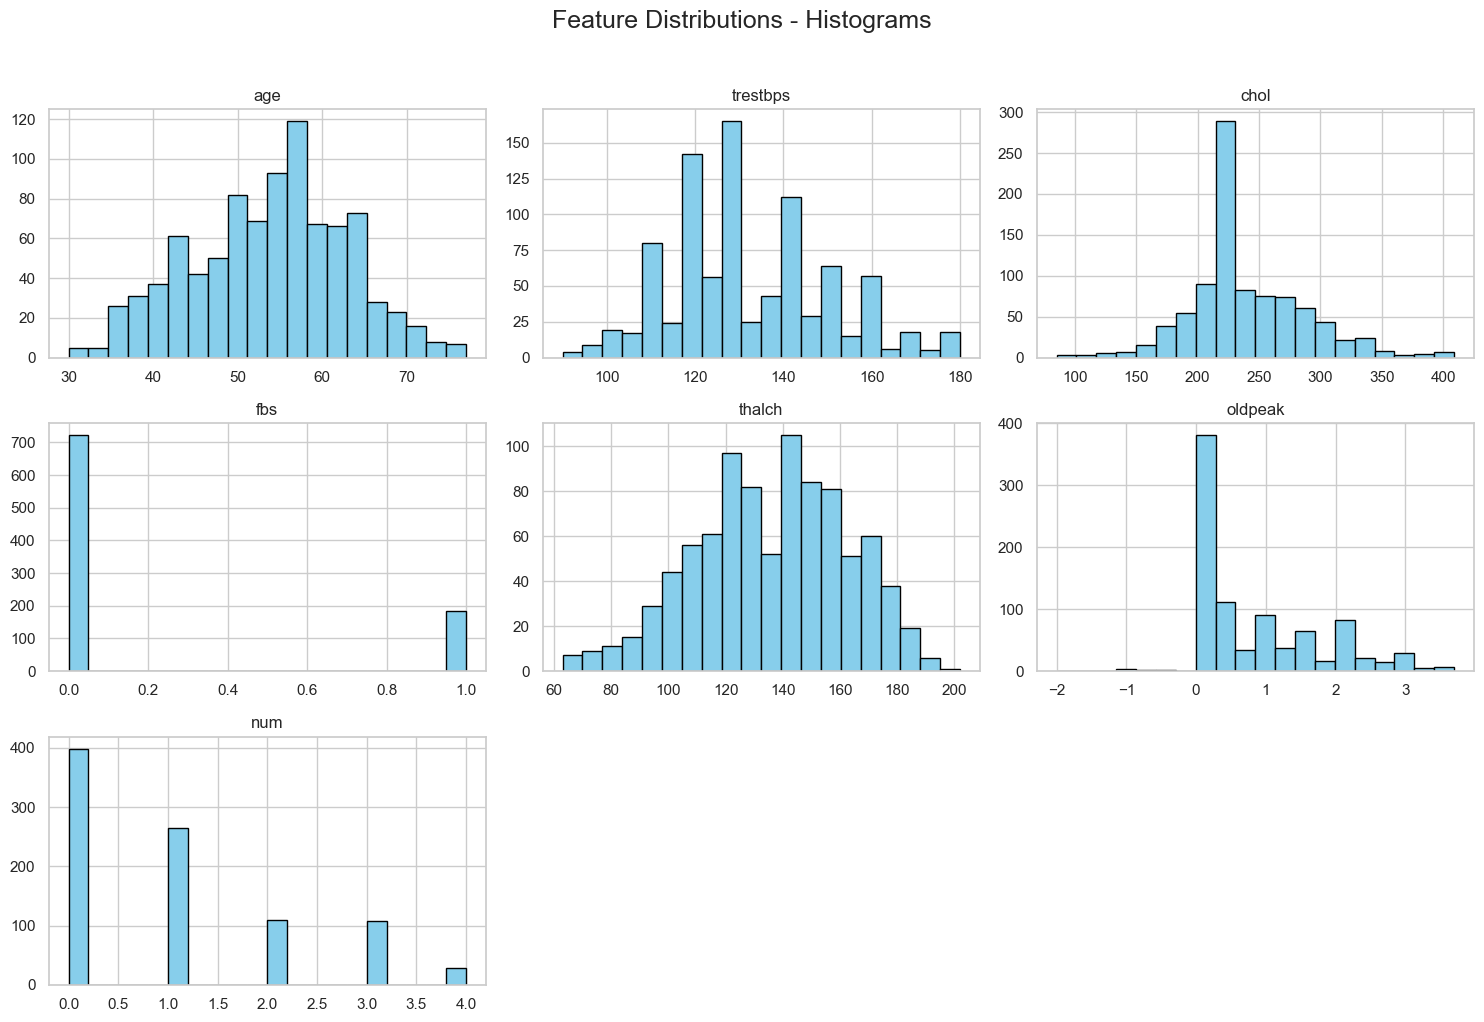

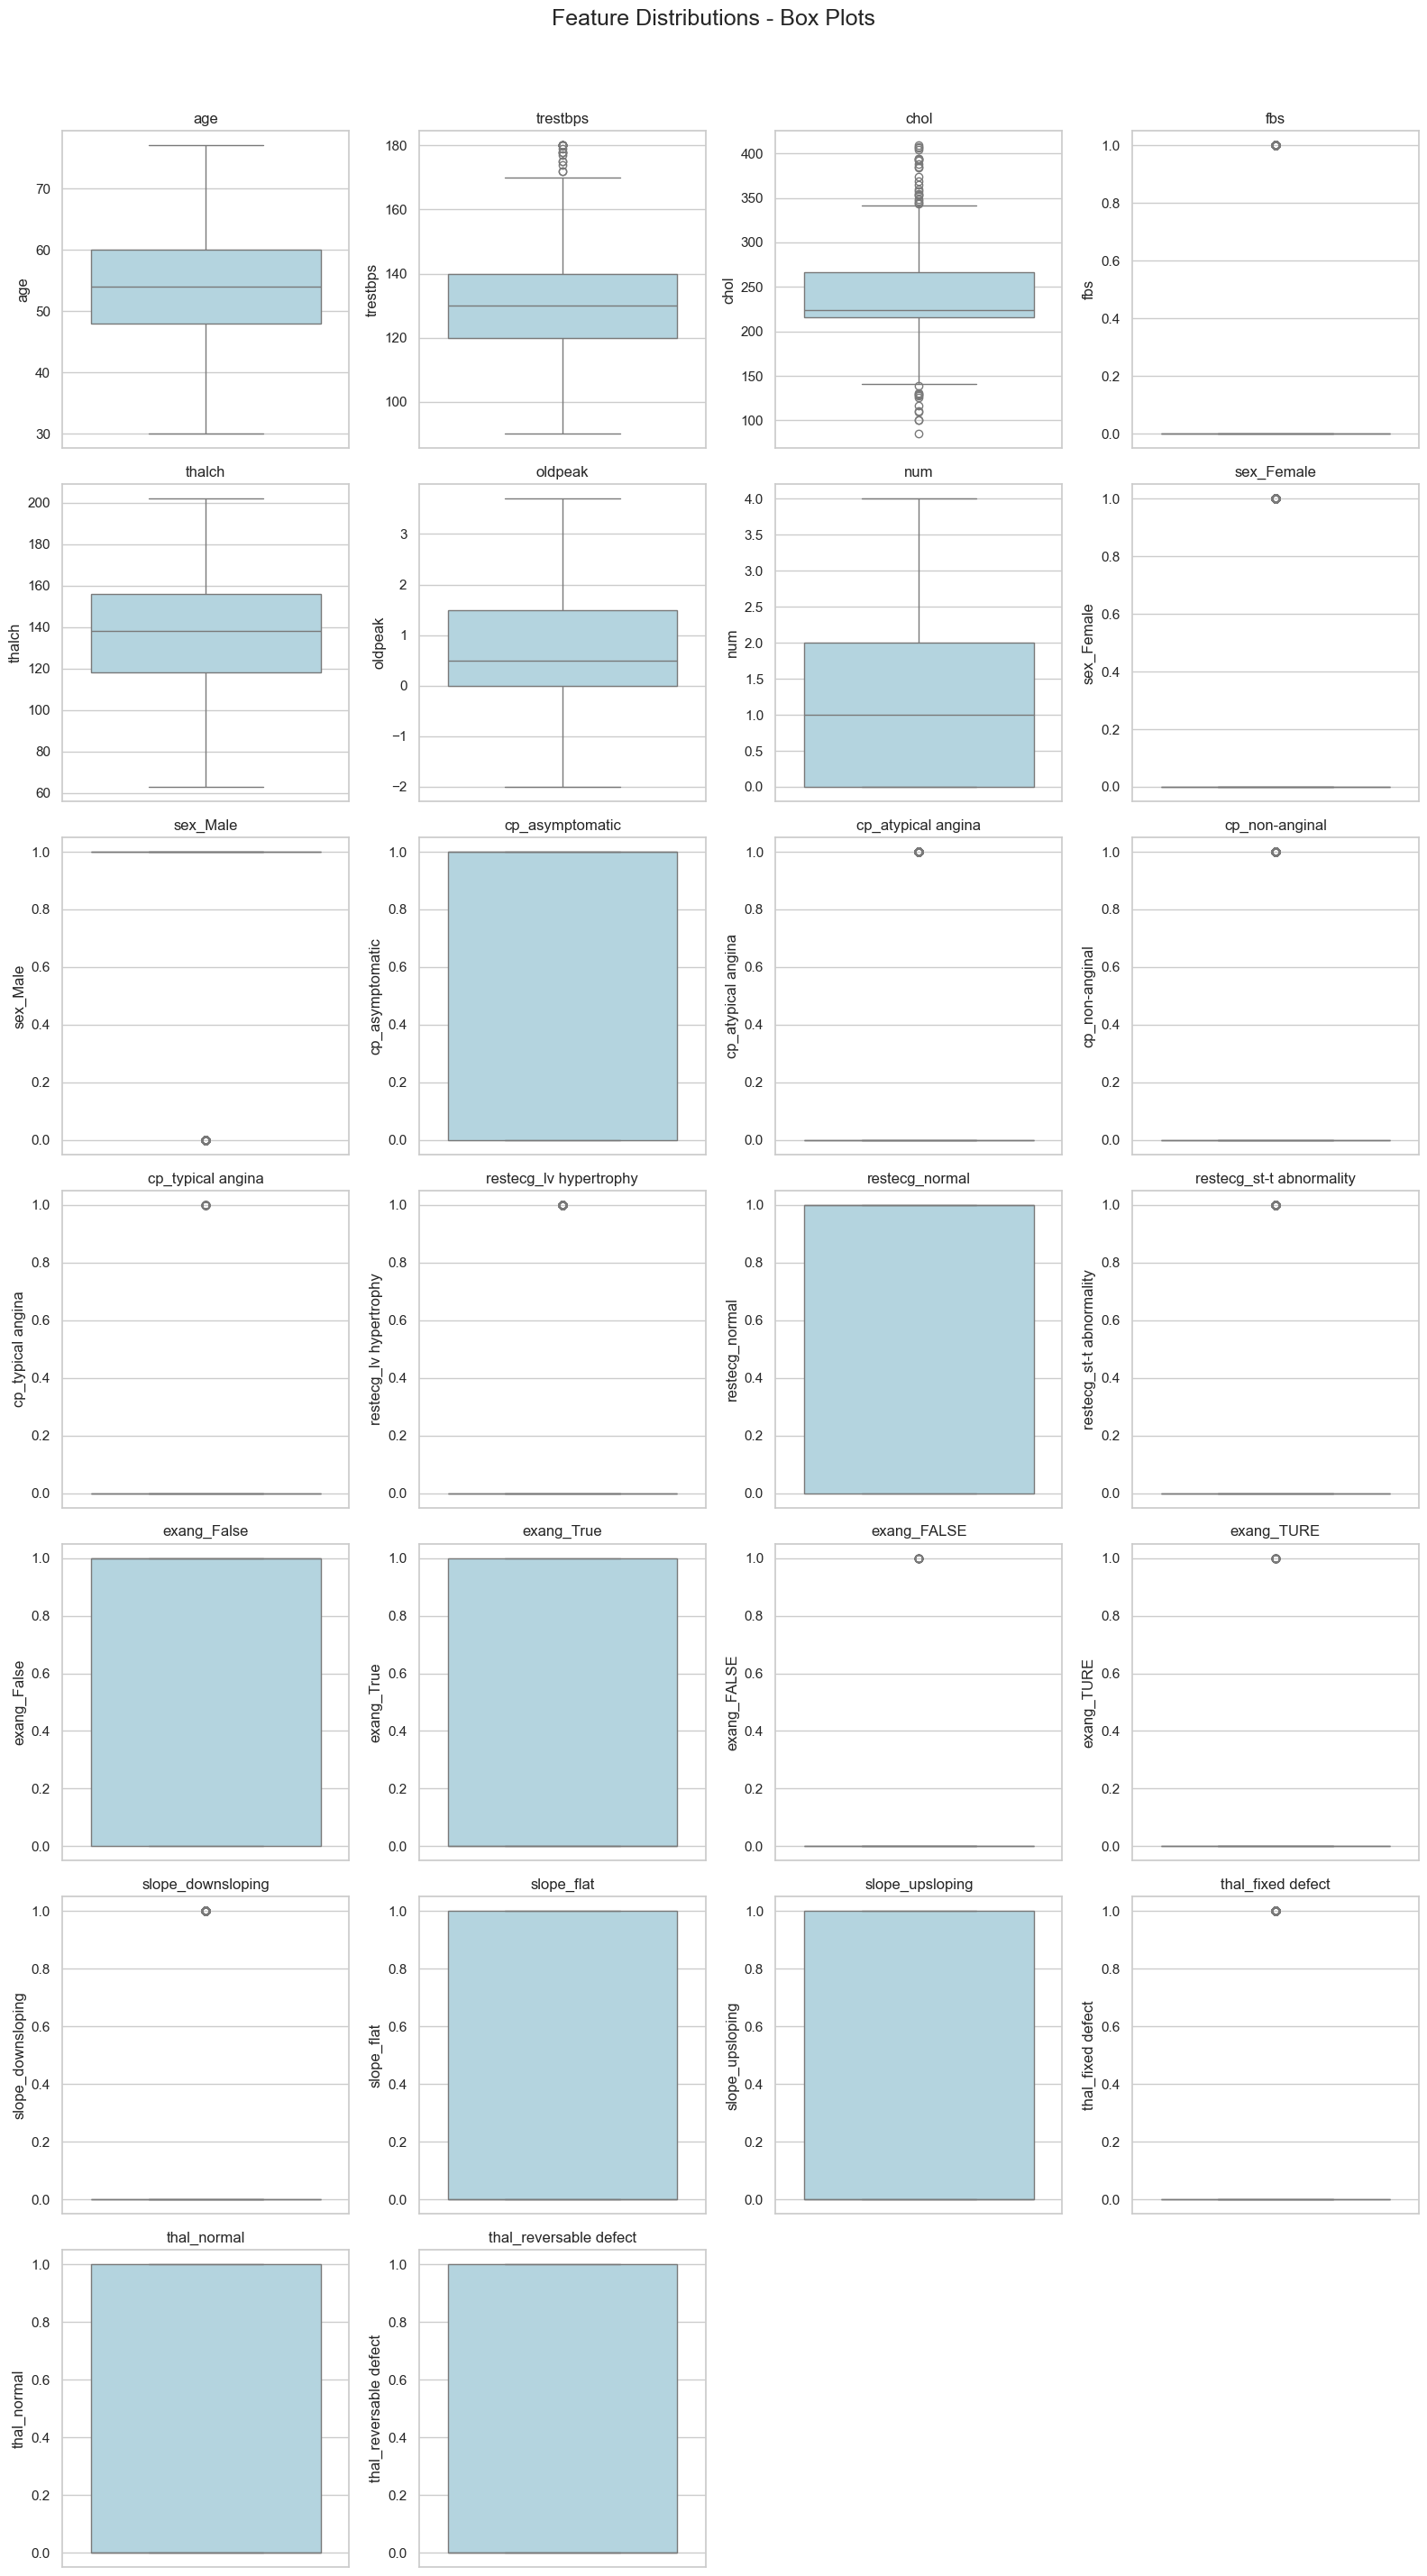

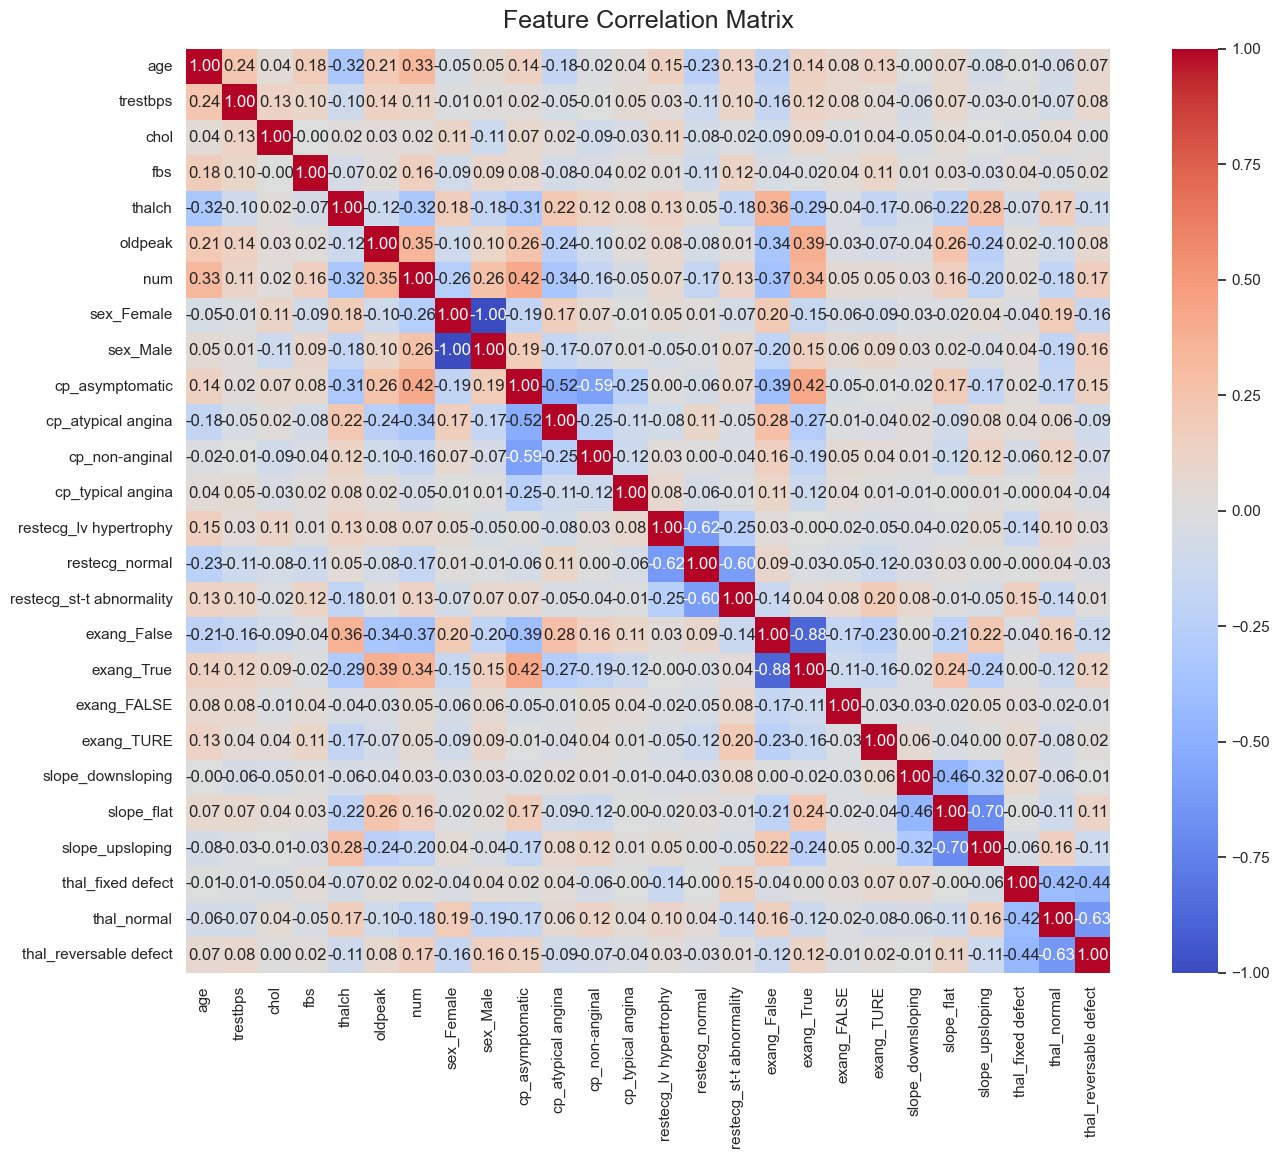

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 1. **Histograms**
plt.figure(figsize=(15, 10))
hrt_d.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions - Histograms', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# 2. **Box Plots**
# Dynamically calculate the number of rows and columns for subplots
num_features = len(hrt_d.columns)
cols = 4  # Number of columns per row
rows = (num_features // cols) + (1 if num_features % cols != 0 else 0)

plt.figure(figsize=(16, rows * 4))
for i, column in enumerate(hrt_d.columns):
    plt.subplot(rows, cols, i + 1)  # Dynamic grid layout
    sns.boxplot(data=hrt_d[column], color='lightblue')
    plt.title(column, fontsize=12)
plt.suptitle('Feature Distributions - Box Plots', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# 3. **Correlation Matrix**
plt.figure(figsize=(16, 12))
correlation_matrix = hrt_d.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Feature Correlation Matrix', fontsize=18, pad=15)
plt.show()


In [9]:
hrt_d.dtypes

age                           int64
trestbps                      int64
chol                          int64
fbs                           int64
thalch                        int64
oldpeak                     float64
num                           int64
sex_Female                     bool
sex_Male                       bool
cp_asymptomatic                bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_lv hypertrophy         bool
restecg_normal                 bool
restecg_st-t abnormality       bool
exang_False                    bool
exang_True                     bool
exang_FALSE                    bool
exang_TURE                     bool
slope_downsloping              bool
slope_flat                     bool
slope_upsloping                bool
thal_fixed defect              bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object

In [10]:
hrt_d.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,0.203744,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,0.403003,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,0.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,4.000000


In [11]:
#Detecting outliers and replacing outliers with median value of  the column
columns = ['age','trestbps','chol','thalch','oldpeak']
for column in columns:
    Q1 = hrt_d[column].quantile(0.25)
    Q3 = hrt_d[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    hrt_d[column] = np.where((hrt_d[column] < lower_bound) | (hrt_d[column] > upper_bound),hrt_d[column].median(),hrt_d[column])
    


In [12]:
hrt_d.describe()

,age,trestbps,chol,fbs,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.819383,132.283040,239.733480,0.203744,136.042952,0.804185,1.008811
std,9.120919,17.840598,46.929649,0.403003,26.685958,0.948941,1.144436
min,30.000000,90.000000,85.000000,0.000000,63.000000,-2.000000,0.000000
25%,48.000000,120.000000,216.000000,0.000000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,2.000000
max,77.000000,180.000000,409.000000,1.000000,202.000000,3.700000,4.000000


In [13]:
#Scaling the dataset values using StandarsScaler
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled_data = scaled.fit_transform(hrt_d)


In [14]:
#For inconsistency 
# Check unique values in categorical columns
categorical_columns = hrt_d.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    print(f"Unique values in '{column}':")
    print(hrt_d[column].unique())

# Check for out-of-range values in numerical columns
numerical_columns = hrt_d.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    print(f"Outliers or inconsistencies in '{column}':")
    print(hrt_d[(hrt_d[column] < 0) | (hrt_d[column] > 200)])  # Example range

# Check for duplicate rows
duplicates = hrt_d[hrt_d.duplicated()]
print("\nDuplicate rows:")
print(duplicates)


Outliers or inconsistencies in 'age':
Empty DataFrame
Columns: [age, trestbps, chol, fbs, thalch, oldpeak, num, sex_Female, sex_Male, cp_asymptomatic, cp_atypical angina, cp_non-anginal, cp_typical angina, restecg_lv hypertrophy, restecg_normal, restecg_st-t abnormality, exang_False, exang_True, exang_FALSE, exang_TURE, slope_downsloping, slope_flat, slope_upsloping, thal_fixed defect, thal_normal, thal_reversable defect]
Index: []

[0 rows x 26 columns]
Outliers or inconsistencies in 'trestbps':
Empty DataFrame
Columns: [age, trestbps, chol, fbs, thalch, oldpeak, num, sex_Female, sex_Male, cp_asymptomatic, cp_atypical angina, cp_non-anginal, cp_typical angina, restecg_lv hypertrophy, restecg_normal, restecg_st-t abnormality, exang_False, exang_True, exang_FALSE, exang_TURE, slope_downsloping, slope_flat, slope_upsloping, thal_fixed defect, thal_normal, thal_reversable defect]
Index: []

[0 rows x 26 columns]
Outliers or inconsistencies in 'chol':
      age  trestbps   chol  fbs  thalc

In [15]:
#Splitting the data
y = hrt_d['num']
x = hrt_d.drop(columns = ['num'])

In [16]:
#Splitting the data into training and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [17]:
#Creating a decision tree object
DT = DecisionTreeRegressor(random_state = 42)

In [18]:
#Training the model
DT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
#Predicting the model
y_pred = DT.predict(x_test)

In [20]:
#Model accuracy 
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.8956043956043956


In [21]:
mse = mean_squared_error(y_test,y_pred)
print("Mean_square_error",mse)

Mean_square_error 2.0054945054945055


In [22]:
#HyperParameter Tuning
param_grid = {'max_depth':[None,5,10,20],
              'min_samples_split':[2,5,10],
              'criterion':['squared_error','absolute_error']
             }

In [23]:
#Using grid_search to apply the parameters
grid_search = GridSearchCV(estimator = DT,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'neg_mean_squared_error',
                           n_jobs = 1
                           
                          )

In [24]:
#Training with model
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [25]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [26]:
print(best_params)

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_split': 10}


In [27]:
#After Predicting using mse and mae for model validation
y_pred1 = best_model.predict(x_test)
mse1 = mean_squared_error(y_test,y_pred1)

In [28]:
print(mse1)

1.0934065934065933


In [29]:
mae1 = mean_absolute_error(y_test,y_pred1)
print(mae1)

0.6208791208791209


In [30]:
r2 = r2_score(y_test,y_pred1)

In [31]:
print(r2)

0.14136696616960265


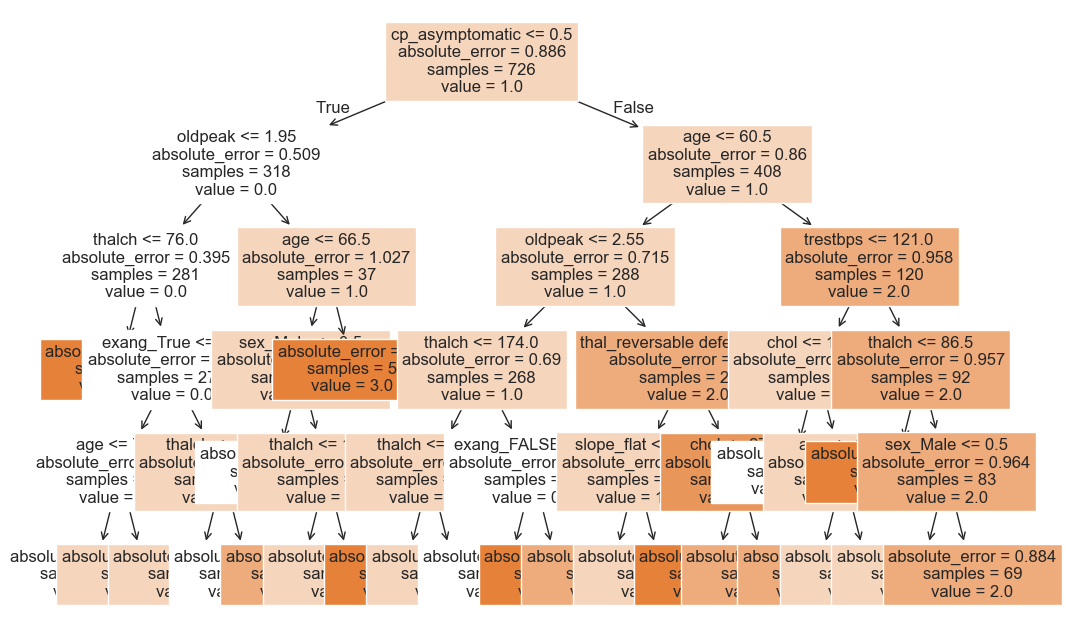

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained decision tree model and 'x_train' is your training data
plt.figure(figsize=(12,8)) 
plot_tree(best_model, filled=True, 
          feature_names=x_train.columns, 
          fontsize=12)  
plt.show()


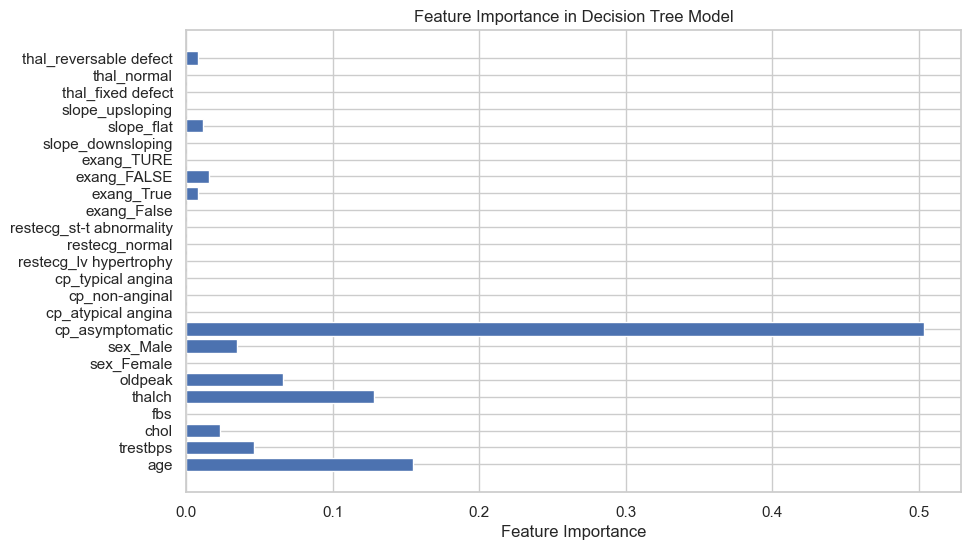

In [33]:
import numpy as np

# Get the feature importances from the trained model
feature_importances = best_model.feature_importances_

# Create a bar chart to show the importance of each feature
plt.figure(figsize=(10,6))
plt.barh(np.array(x_train.columns), feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Decision Tree Model")
plt.show()


In [1]:
#Max Depth: The maximum depth of the tree. Limiting it can prevent overfitting by controlling the model's complexity.
#Min Samples Split: The minimum number of samples required to split an internal node. A higher value can lead to a more generalized model.
#Max Leaf Nodes: The maximum number of leaf nodes in the tree. Reducing this can lead to a simpler model with fewer decision boundaries.
#Criterion: The function to measure the quality of a split (e.g., Gini impurity or entropy). It impacts how splits are chosen.

In [2]:
#Overfitting: Small values for max depth or higher values for min samples per split/leaf prevent overfitting.
#Underfitting: Larger max depth and fewer constraints may lead to overfitting, where the model becomes too complex and starts capturing noise.

In [ ]:
#